# Discovery and Learning with Big Data/Machine Learning
### Austin Glenn 
### Machine Learning Supervised Logistic Regression

# Supervised Learning Workflow

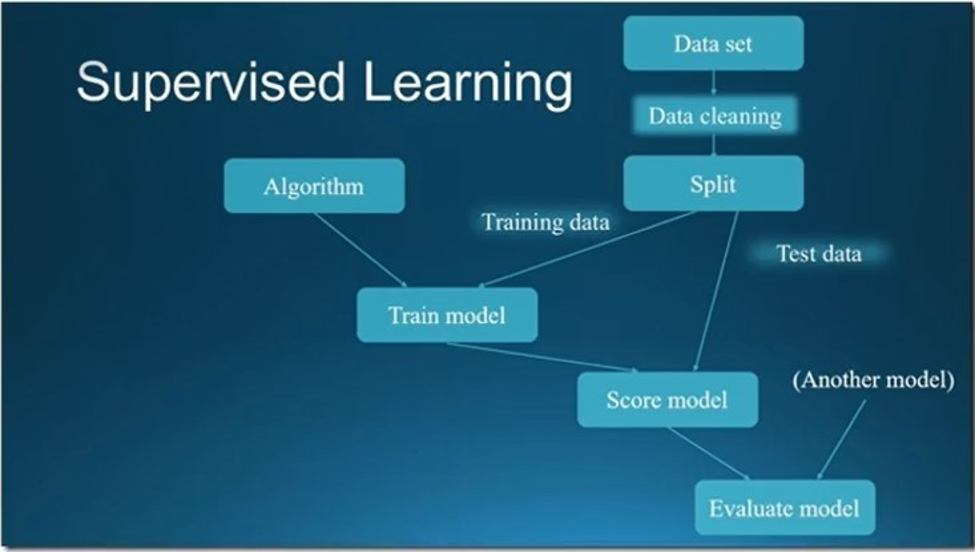
- You can see in this picture that supervised learning startw with the data set.  Remember since it is supervised, the data is labeled.  Then there is some data preprocessing (cleaning) to be done.  Next, you will declare your input (X/Indepentdent variables) and output (Target Variable/Dependent or Y) NumPy Arrays.  Then the data is split into a testing and training set.  Then you will build and train the model, use the model for predictions, and lastly, evaluate/validate the model.  So let's begin.

### Description Iris Dataset

Data Set: Iris.csv
Title: Iris Plants Database
Updated Sept 21 by C. Blake -Added discrepancy information 
Sources:
- Creator: RA_ Fisher 
- Donor: Michael Marshall 
- Date: 1988 

Relevant Information: This is perhaps the best-known database to be found in the pattern recognition literature. Fishers paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example)

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. 

Predicted attribute: class of iris plant

Number of Instances: 150 (50 in each of three classes)

Number of predictors: 4 numeric, predictive attributes and the class Attribute Information:
- 1.sepal length in cm 
- 2.sepal width in cm 
- 3.petal length in cm 
- 4.petal width incm 
- 5.class: 
    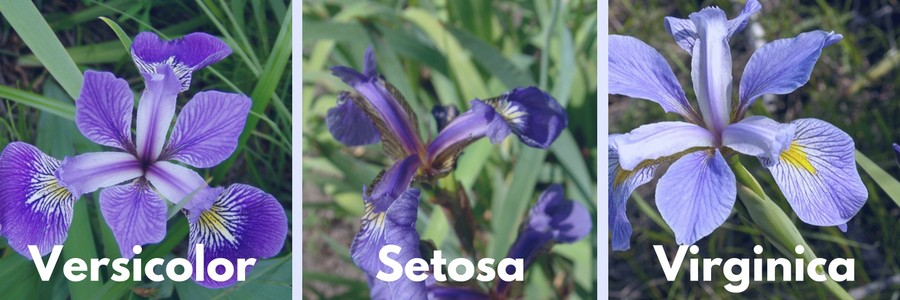


## <span style= 'color: red'>1. What is happening in the code blocks below? Enter your answer by adding a new code block and use markdown.</span>

Importing librarys for analysis purposes such as pandas, numpy, seaborn and matplotlib
and their associated functions such as logistic regression, model training and Kfold validation

In [2]:
# Import Python Libraries: NumPy and Pandas
import pandas as pd
import numpy as np

In [3]:
# Import Libraries & modules for data visualization
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import scikit-Learn module for the algorithm/modeL: Logistic Regression
from sklearn.linear_model import LogisticRegression

In [5]:
# Import scikit-Learn module to split the dataset into train/ test sub-datasets
from sklearn.model_selection import train_test_split

In [6]:
# Import scikit-Learn module for K-fold cross-validation - algorithm/modeL evaluation & validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [7]:
# Import scikit-Learn module classification report to later use for information about how the system 
#try to classify / lable each record
from sklearn.metrics import classification_report

##  <span style= 'color: red'>2. What is happening in the code block below question 3? Enter your answer by adding a new code block and use markdown.</span>

uploading a dataset in the form of a .csv file called 'iris.csv'

##  <span style= 'color: red'>3. What would happen to the code if you enter '..iris.csv' instead of 'iris.csv'?  You should create a new code block and make the change to the code and then run the code.  This will create an error code.   Create a new code block and enter the error code in that 2nd created code block using markdown.  Don't forget to delete the code block were you entered '..iris.csv', the incorrect code.</span>

In [9]:
# Specify location of the dataset
filename = 'iris.csv'
# Load the data into a Pandas DataFrame
df = pd.read_csv(filename)

---------------------------------------------------------------------------
FileNotFoundError                         Traceback (most recent call last)
<ipython-input-10-3aba5c6bd880> in <module>
      2 filename = '..iris.csv'
      3 # Load the data into a Pandas DataFrame
----> 4 df = pd.read_csv(filename)

/opt/conda/lib/python3.7/site-packages/pandas/io/parsers.py in parser_f(filepath_or_buffer, sep, delimiter, header, names, index_col, usecols, squeeze, prefix, mangle_dupe_cols, dtype, engine, converters, true_values, false_values, skipinitialspace, skiprows, skipfooter, nrows, na_values, keep_default_na, na_filter, verbose, skip_blank_lines, parse_dates, infer_datetime_format, keep_date_col, date_parser, dayfirst, cache_dates, iterator, chunksize, compression, thousands, decimal, lineterminator, quotechar, quoting, doublequote, escapechar, comment, encoding, dialect, error_bad_lines, warn_bad_lines, delim_whitespace, low_memory, memory_map, float_precision)
    674         )
    675 
--> 676         return _read(filepath_or_buffer, kwds)
    677 
    678     parser_f.__name__ = name

/opt/conda/lib/python3.7/site-packages/pandas/io/parsers.py in _read(filepath_or_buffer, kwds)
    446 
    447     # Create the parser.
--> 448     parser = TextFileReader(fp_or_buf, **kwds)
    449 
    450     if chunksize or iterator:

/opt/conda/lib/python3.7/site-packages/pandas/io/parsers.py in __init__(self, f, engine, **kwds)
    878             self.options["has_index_names"] = kwds["has_index_names"]
    879 
--> 880         self._make_engine(self.engine)
    881 
    882     def close(self):

/opt/conda/lib/python3.7/site-packages/pandas/io/parsers.py in _make_engine(self, engine)
   1112     def _make_engine(self, engine="c"):
   1113         if engine == "c":
-> 1114             self._engine = CParserWrapper(self.f, **self.options)
   1115         else:
   1116             if engine == "python":

/opt/conda/lib/python3.7/site-packages/pandas/io/parsers.py in __init__(self, src, **kwds)
   1889         kwds["usecols"] = self.usecols
   1890 
-> 1891         self._reader = parsers.TextReader(src, **kwds)
   1892         self.unnamed_cols = self._reader.unnamed_cols
   1893 

pandas/_libs/parsers.pyx in pandas._libs.parsers.TextReader.__cinit__()

pandas/_libs/parsers.pyx in pandas._libs.parsers.TextReader._setup_parser_source()

FileNotFoundError: [Errno 2] File ..iris.csv does not exist: '..iris.csv'

##  <span style= 'color: red'>4. What does the df.head function do?  Enter your answer by adding a new code block and use markdown.</span>

df.head() function reads the first 5 rows of the dataset

In [11]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##  <span style= 'color: red'>5. What is different between the output of the df.head() in your linear regression homework and this logistic regression homework?  Enter your answer by adding a new code block and use markdown.</span>

linear regression hw dealt with real estate data, this dataset is about a flower/s(?) that measure the charateristics and physical makeup of the object

## Preprocess the Dataset

##  <span style= 'color: red'>6. What is happening in the code block below?  Enter your answer by adding a new code block and use markdown.</span>

creating an array that replaces zero values as NaN (Not a Number) then printing the columns with zero values

In [12]:
# mark zero values as missing or NaN
df[[ 'SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' ,'PetalWidthCm' ]] \
= df[['SepalLengthCm' , 'SepalWidthCm' ,'PetalLengthCm' , 'PetalWidthCm' ]].replace(0,np.NaN)
# count the number of NaN values in each column
print (df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


## Performing the Exploratory Data Analysis (EDA)

##  <span style= 'color: red'>7. What is happening when df.shape is being called and how many rows and columns are in the dataset?  Enter your answer by adding a new code block and use markdown.</span>

The architecture is displayed, 150 rows: 6 columns

In [13]:
print("Shape of the dataset(rows, columns):",df.shape)

Shape of the dataset(rows, columns): (150, 6)


##  <span style= 'color: red'>8. What is happening when df.dtypes is being called. Enter your answer by adding a new code block and use markdown.</span>

the datatype of the values

In [14]:
#get the data types of all the variables / attributes in the data set
print(df.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


##  <span style= 'color: red'>9. What is happening when df.describe is being called? Enter your answer by adding a new code block and use markdown.</span>

a statististical function is displayed for each variable

##  <span style= 'color: red'>10. What is the mean of SepalWidthCM? Enter your answer by adding a new code block and use markdown.</span>

3.054000

##  <span style= 'color: red'>11. What is the mean of PetalWidthCM? Enter your answer by adding a new code block and use markdown.</span>

1.198667

##  <span style= 'color: red'>12. What is the count of PetalLengthCM? Enter your answer by adding a new code block and use markdown.</span>

150

In [15]:
#return the summary statistics of the numeric variables / attributes in the data set
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


##  <span style= 'color: red'>13. What does the df.groupby.size() function do?  Enter your answer by adding a new code block and use markdown.</span>

groups values together based upon specified argument

In [16]:
print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### Creating a Histogram

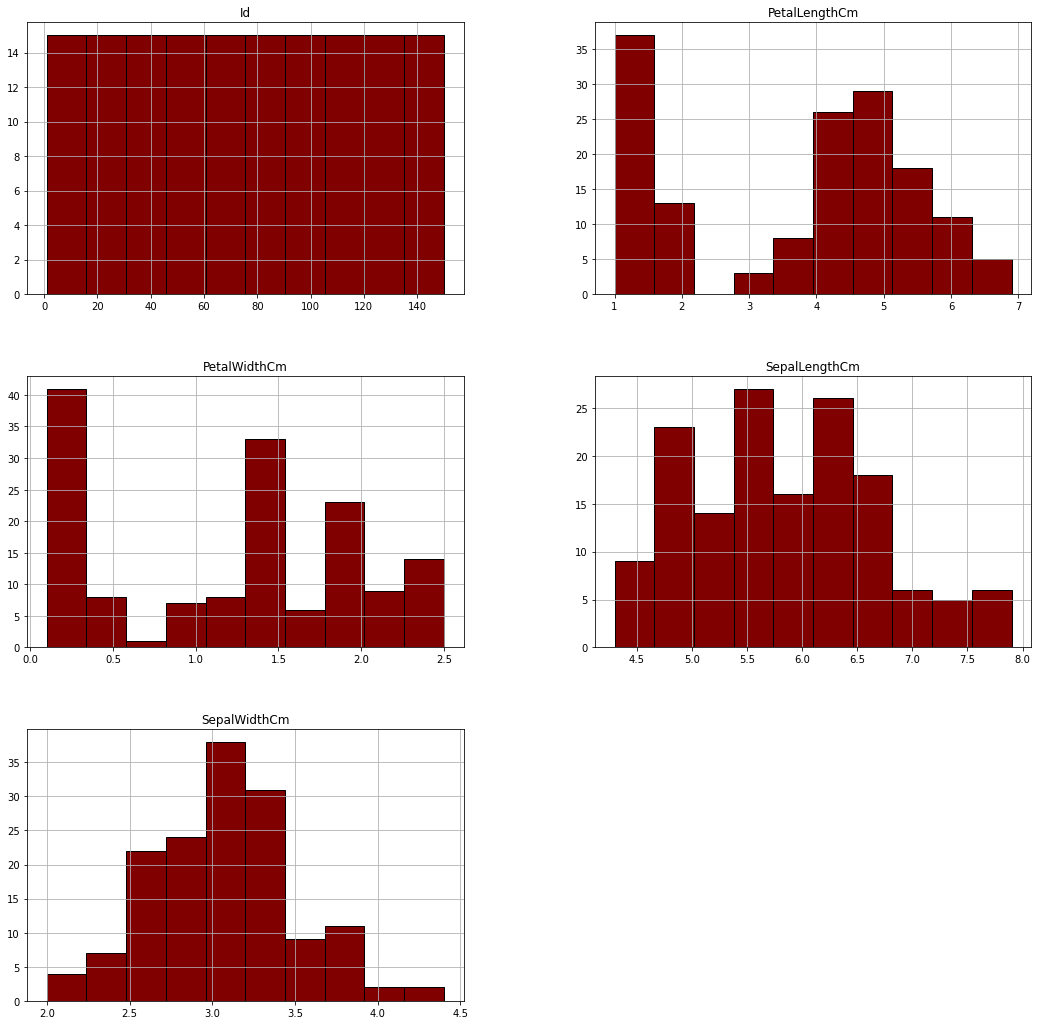

In [18]:
# Plot histogram for each variable. I encourage you to work with the histogram. Remember what you did in the previous homework.
df.hist(edgecolor= 'black', color= 'maroon',figsize=(18,18))
plt.show()

### Creating a Box Plot

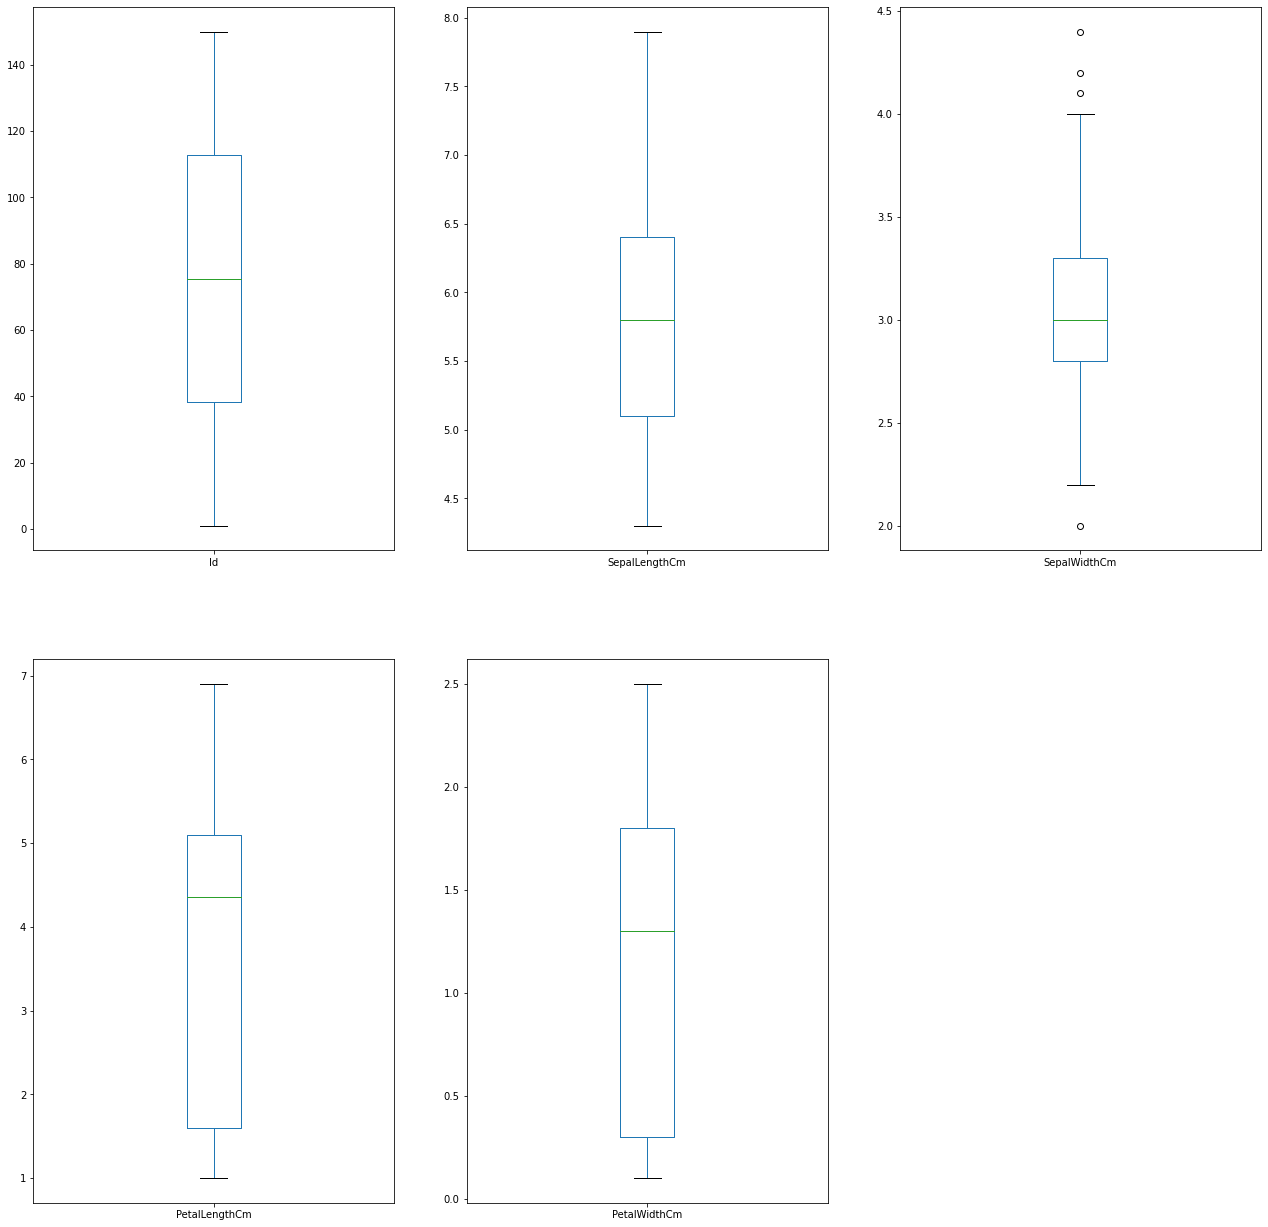

In [22]:
# Boxplots
df.plot(kind="box", subplots=True, layout=(2,3), sharex=False, figsize=(22,22))
plt.show()

### Create a Pair Plot 

##  <span style= 'color: red'>14. What does a pair plot illustrate?   Enter your answer by adding a new code block and use markdown.</span>

the relationship and distributions in datsets 

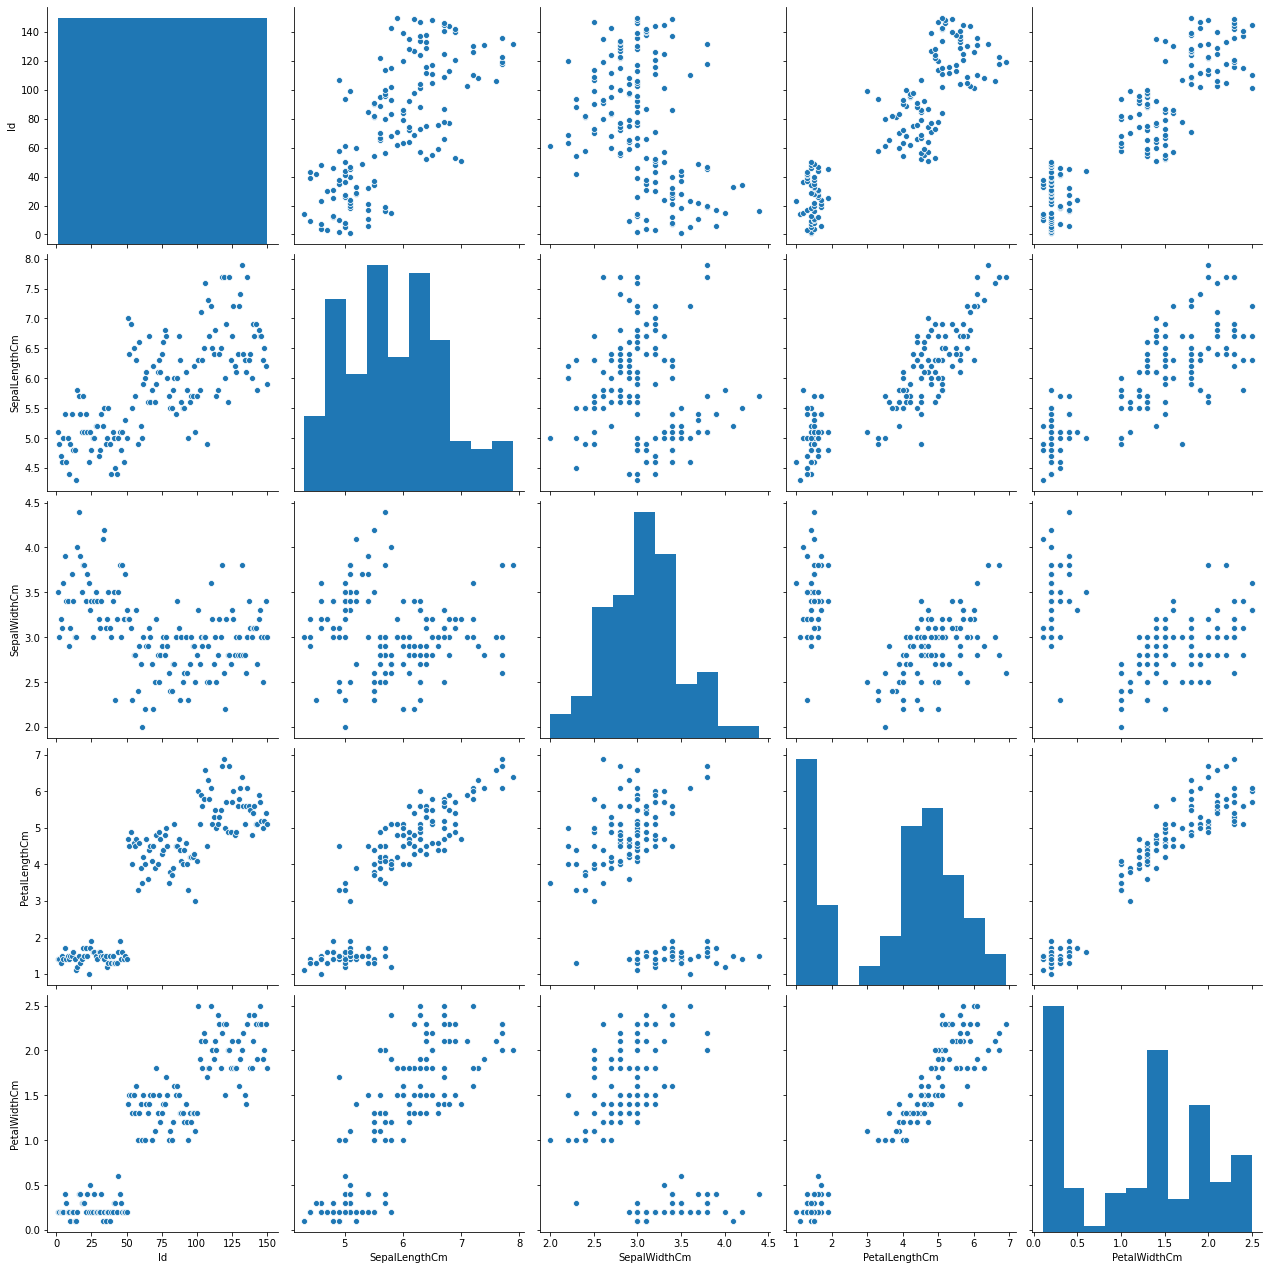

In [23]:
# Please click on the aobe URL to learn more about Pair Plots
sns.pairplot(df, height=3.5);
plt.show()

##  <span style= 'color: red'>15. Create a new sns.pairplot using a height of 4.0.  Enter your answer by adding a new code block and use code.</span>

### Creating a Pair Plot with Color

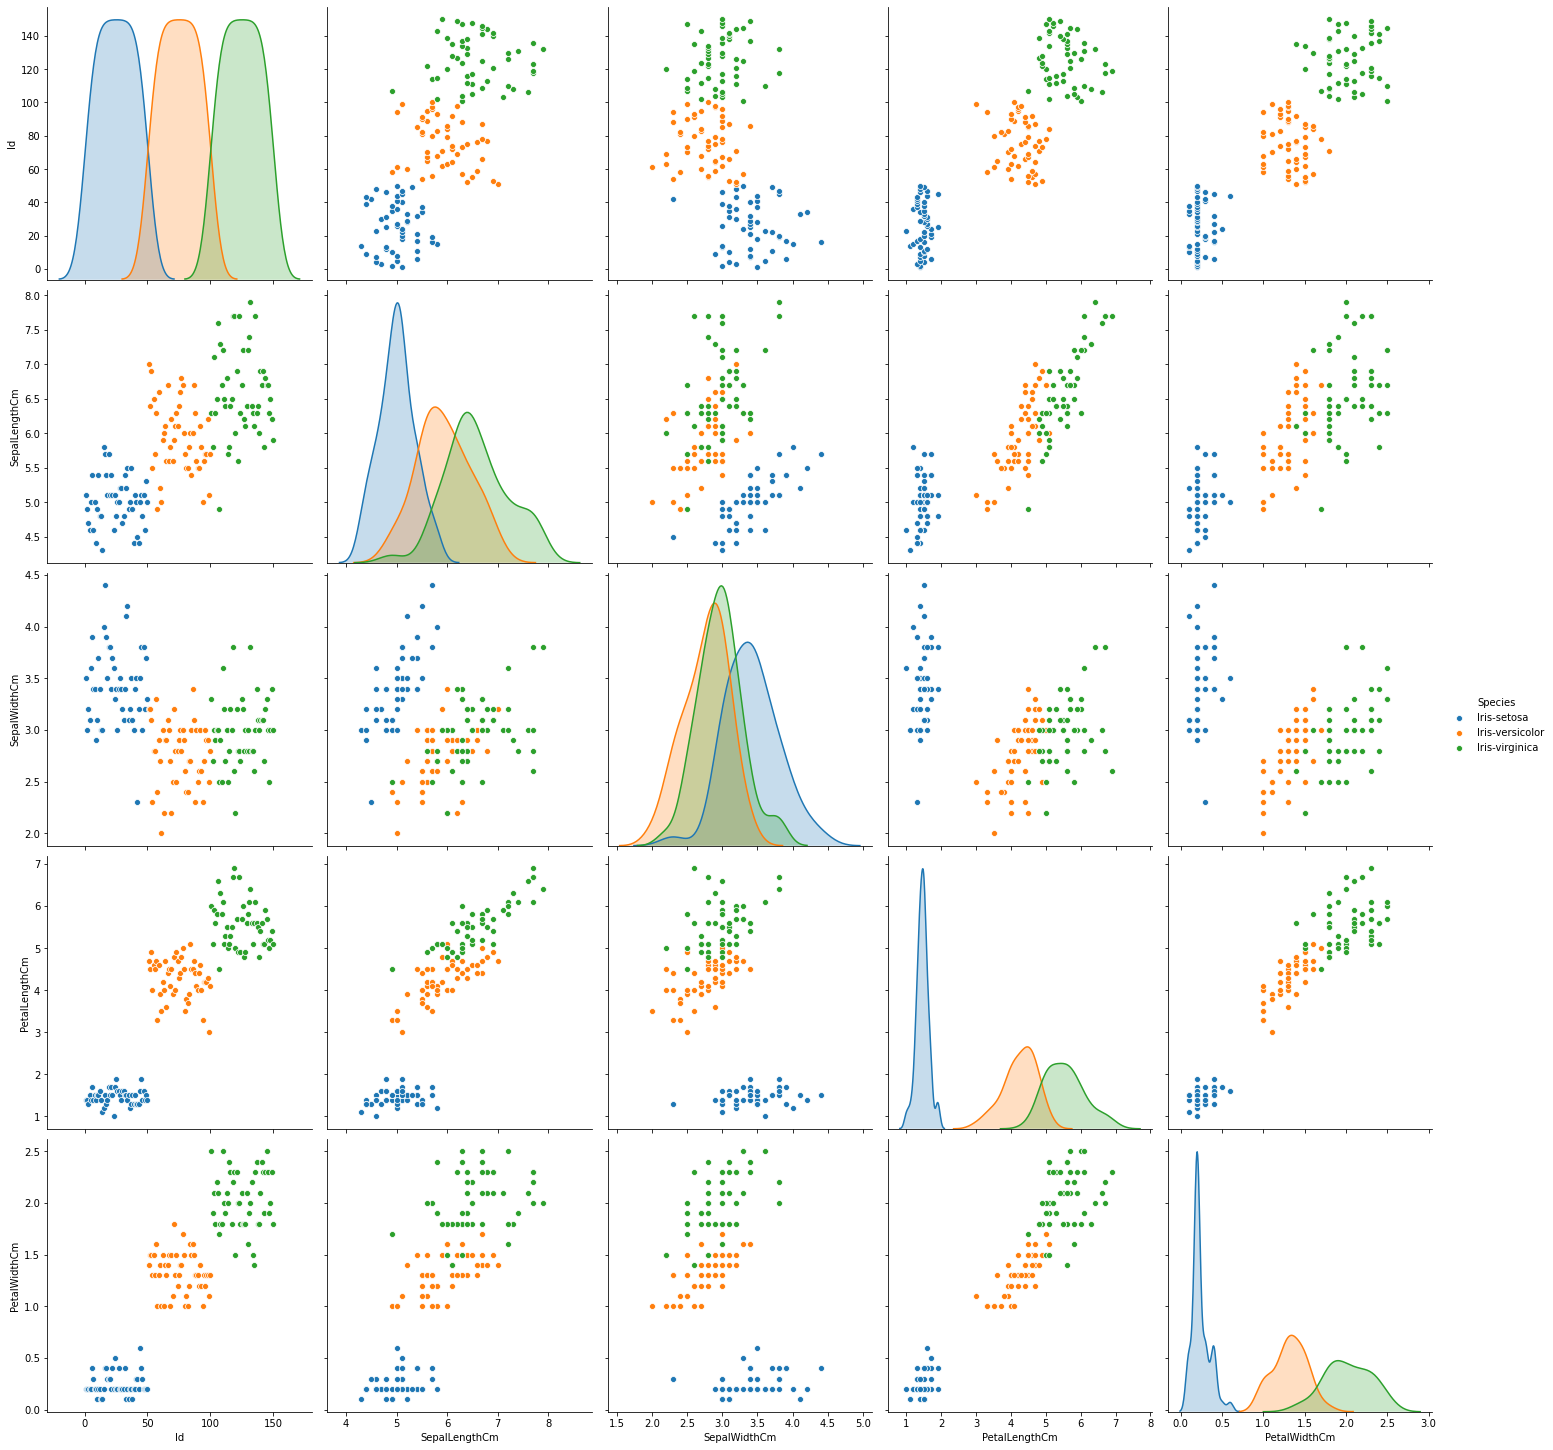

In [24]:
# Let's try that again using color.  Notice: assigning a hue variable adds a semantic mapping and changes the default marginal plot to a layered kernel density estimate (KDE)
sns.pairplot(df, hue='Species', height=4.0, aspect= 1);


### Creating a Violin Plot  

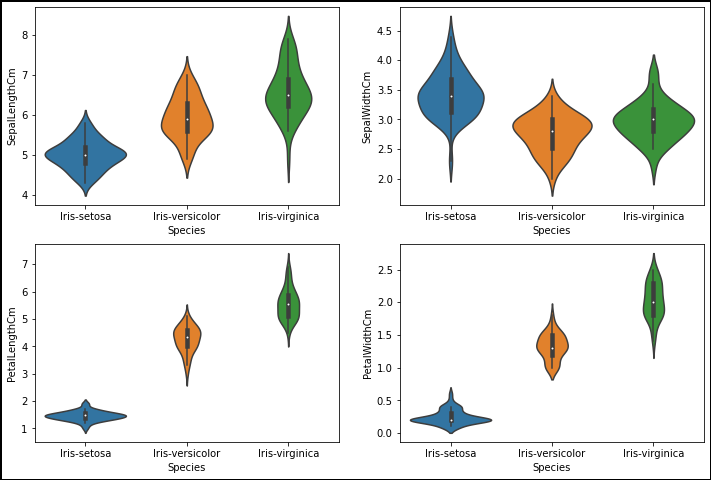

In [25]:
#  Please click on the URL above to learn more about Violin Plots
plt.figure(edgecolor="black", linewidth= 1.2,figsize=(12,8));
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=df);

##  <span style= 'color: red'>16. Using above code that created a Violin Plot, add a new code block and change the edgecolor to 'red' and the figsize to 15, 10.)  Don't forget to hit run.</span>

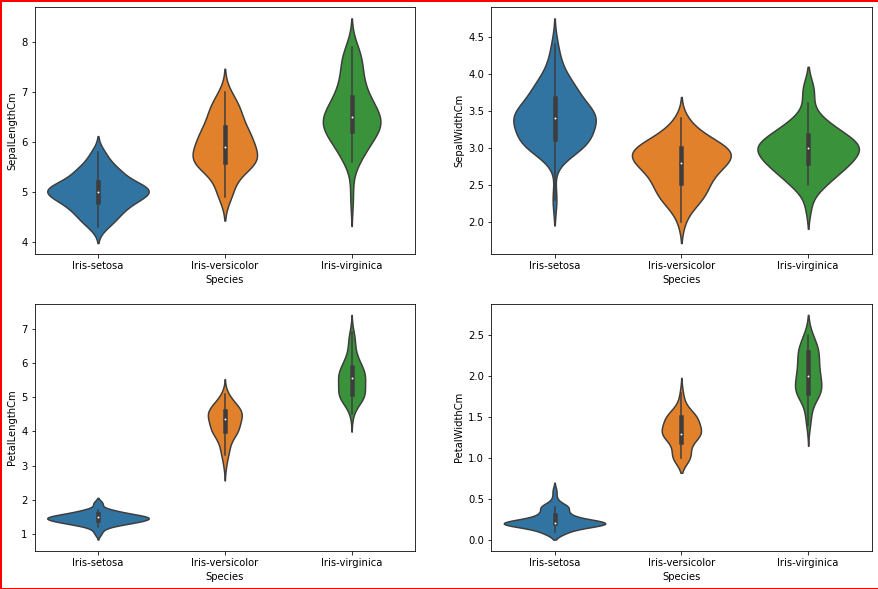

In [26]:
plt.figure(edgecolor="red", linewidth= 1.2,figsize=(15,10));
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=df);

### Separate the Dataset into Input & Output NumPy Arrays

In [27]:
# store dataframe values into a numpy array
array = df.values
# separate array into input and output by slicing
# for X(input) [:, 1:5] --> all the rows, columns from 1 - 5 
# these are the independent variables or predictors
X = array[:,1:5]
# for Y(input) [:, 5] --> all the rows, column 5
# this is the value we are trying to predict
Y = array[:,5]

##  <span style= 'color: red'>17. What would you set the X = array to if you only wanted to use the first 100 rows? Enter your answer by adding a new code block and copy and paste the above code but change the code to reflect your answer. However, be sure to comment out all lines so only the original code block is used in the analysis.</span>

In [28]:
# store dataframe values into a numpy array
array = df.values
# separate array into input and output by slicing
# for X(input) [:, 1:5] --> all the rows, columns from 1 - 5 
# these are the independent variables or predictors

# for x(input) [:, 1:100] --> all the rows, columns from 1 - 100
X = array[:,1:5]
# for Y(input) [:, 5] --> all the rows, column 5
# this is the value we are trying to predict
Y = array[:,5]

### Spilt into Input/Output Array into Training/Testing Datasets

In [29]:
# split the dataset --> training sub-dataset: 67%; test sub-dataset: 33%
test_size = 0.33
#selection of records to include in each data sub-dataset must be done randomly
seed = 7
#split the dataset (input and output) into training / test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

##  <span style= 'color: red'>18. What seed are you using in the above code?  Enter your answer by adding a new code block and use markdown.</span>

random_state 

##  <span style= 'color: red'>19. Why do we enter a seed value?  Enter your answer by adding a new code block and use markdown.</span>

to give the AI a random set of numbers to work with

##  <span style= 'color: red'>20. How do you know there is a 67/33 split?  Enter your answer by adding a new code block and use markdown.</span>

because the test sub-dataset size is 0.33 meaning the training sub-dataset will be .67 

### Build and Train the Model

##  <span style= 'color: red'>21. What is the model being used below? Enter your answer by adding a new code block and use markdown.</span>

Logistic Regression

In [30]:
#build the model
model = LogisticRegression(random_state=seed, max_iter=1000)
# train the model using the training sub-dataset
model.fit(X_train, Y_train)
#print the classification report
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print("Classification Report: ", "\n", "\n",report)

Classification Report:  
 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.89      0.89      0.89        18
 Iris-virginica       0.89      0.89      0.89        18

       accuracy                           0.92        50
      macro avg       0.93      0.93      0.93        50
   weighted avg       0.92      0.92      0.92        50



### Score the Accuracy of the Model

In [31]:
#score the accuracy leve
result = model.score(X_test, Y_test)
#print out the results
print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 92.000%


## Classify/Prediction


   
 <div class="alert alert-block alert-info">
<b> <h3>We have now trained the model. Let’s use the trained model to predict the type of flower we have with the listed values for each variable.
 </h3></b> 
</div>

##  <span style= 'color: red'>22. How would you enter comments to the model.predict to illustrate the variables and values that you used in your prediction? Enter your answer by adding a new code block and use markdown.</span>

In [32]:
# This will predict if 'SepalLengthCm'= 5.3 , 'SepalWidthCm'= 3.0 , 'PetalLengthCm' = 4.5 ,'PetalWidthCm'= 1.5 --> then 'Iris-versicolor'

model.predict([[5.3, 3.0, 4.5, 1.5]])

array(['Iris-versicolor'], dtype=object)

##  <span style= 'color: red'>23.  (Same as above, but with the second prediction. How would you enter comments to the model.predict to illustrate the variables and values that you used in your prediction? Enter your answer by adding a new code block and use markdown.</span>

In [34]:
# This will predict if 'SepalLengthCm'= 5 , 'SepalWidthCm'= 3.6 , 'PetalLengthCm' = 1.4 ,'PetalWidthCm'= 1.5 --> then 'Iris-setosa'

model.predict([[5, 3.6, 1.4, 1.5]])

array(['Iris-setosa'], dtype=object)

##  <span style= 'color: red'>24. Make a new prediction by copying and pasting the code above into a new code block.  Include comments to descibe your variable and their values.  (EX. # PetalWidthCm = 7, etc.) Enter your answer by adding a new code block and use code. Don't forget to run the code.</span>

In [35]:
# This will predict if 'SepalLengthCm'= 5 , 'SepalWidthCm'= 3.6 , 'PetalLengthCm' = 1.4 ,'PetalWidthCm'= 7--> then 'Iris-virginica'

model.predict([[5, 3.6, 1.4, 7]])

array(['Iris-virginica'], dtype=object)

## Evaluate the Model using the 10-fold Cross-Validation Technique.

In [36]:
# evaluate the algorythm# specify the number of time of repeated splitting, in this case 10 folds
n_splits=10
#fix the random seed
#must use the same seed value so that the same subsets can be obtained 
# for each time the process is repeated
seed=7
# split the whole dataset into folds
# In k-fold cross-validation, the original sample is randomly partitioned into k
#subsamples. Of the k subsamples, a single subsample is retained as the validatio
#testing the model, and the remaining k 1 subsamples are used as training data. T
#process is then repeated k times, with each of the k subsamples used exactly onc
# the validation data. The k results can then be averaged to produce a single est
# advantage of this method over repeated random sub-sampling is that all observat
# both training and validation, and each observation is used for validation exact
kfold=KFold(n_splits, random_state=seed, shuffle=True)
# for logistic regression, we can use the accuracy level to evaluate the model / 
scoring="accuracy"
#train the model and run K-fold cross validation to validate / evaluate the model
results=cross_val_score (model, X, Y, cv=kfold, scoring=scoring)
# print the evaluation results
#result: the average of all the results obtained from the K-fold cross validation
print("Accuracy: %.3f (%.3f)"% (results.mean(), results.std()))

Accuracy: 0.967 (0.054)


##  <span style= 'color: red'>25. What other splits are recommended for n_splits?  Enter your answer by adding a new code block and use markdown.</span>

any number is fine as long as the number of splits is not greater than the number of samples

##  <span style= 'color: red'>26. Please leave any comments or questions you may have by adding a new code block and using markdown.</span>

# this is a fun class 